<a href="https://colab.research.google.com/github/alinesoares138/SuicidalBehaviourResearch/blob/main/Suicidal_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONTEXTO**

O suicídio é uma ocorrência complexa, influenciada por fatores psicológicos, biológicos, sociais e culturais. Segundo dados da Organização Mundial da Saúde, mais de 700 mil pessoas morrem por ano devido ao suicídio, o que representa uma a cada 100 mortes registradas.

Ainda de acordo com a OMS, as taxas mundiais de suicídio estão diminuindo, mas na região das Américas os números vêm crescendo. Entre 2000 e 2019, a taxa global diminuiu 36%. No mesmo período, nas Américas, as taxas aumentaram 17%. Entre os jovens de 15 a 29 anos, o suicídio aparece como a quarta causa de morte mais recorrente, atrás de acidentes no trânsito, tuberculose e violência interpessoal.

O consumo de álcool e substâncias psicoativas durante a infância e adolescência possuem relação direta com casos de suicídio entre jovens, segundo Antônio Geraldo da Silva, psiquiatra e presidente da Associação Brasileira de Psiquiatria. “O abuso de álcool e outras drogas funciona atuando no ponto desencadeador do suicídio, que é a doença mental chamada depressão, ou seja, os transtornos afetivos. Esse fator representa de 36% a 37% da população que cometeu suicídio”.


### **Problemática**

Ao contrário do que se pensa, a maioria das pessoas com comportamento suicida dá sinais ou fala sobre suas ideias de morte. A decisão não é individual e é causada por uma doença que altera de forma radical a percepção da realidade. Dessa forma, a vontade de tirar a própria vida pode ser tratada e curada.

Compreender a carga e os determinantes do suicídio durante a adolescência é fundamental para alcançar as metas globais de saúde.

### **Objetivo**

Criar um modelo descritivo em que seja possível testar hipóteses através de modelos estatísticos.

### **Tarefas**

1. Testar a causalidade de ter pais presentes
2. Testar a causalidade de ter amigos próximos
3. Testar a causalidade de ambos fatores conjuntamente


Estrutura de Dados:

ETAPAS DO PROJETO:(imagem)


# **1. IMPORTAÇÕES**

In [157]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphics
import scipy.stats 
import statsmodels.api as sm

# **2. COLETA DE DADOS**

###**Core Modules**
The GSHS questionnaire is comprised of 10 core modules addressing the leading causes of morbidity and mortality among children and adults worldwide:

* alcohol use
-dietary behaviours
-drug use
-hygiene
-mental health
-physical activity
-protective factors
-sexual behaviours
-tobacco use
-violence and unintentional injury

In [202]:
# previewing the dataset
data = pd.read_csv('/content/GHSH_Pooled_Data.csv')
data.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


# **3. LIMPEZA E EXPLORAÇÃO DE DADOS**

In [125]:
# Counting missing value
missing_value_count = data.isnull().sum()
missing_value_count

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 2
Had_fights                          0
Bullied                             4
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

In [130]:
# filling the null values with the collumn's mean
data['Smoke_cig_currently']=data['Smoke_cig_currently'].fillna(data['Smoke_cig_currently'].mean())
data['Bullied']=data['Bullied'].fillna(data['Bullied'].mean())

# checking the missing value again
missing_value_count = data.isnull().sum()
missing_value_count

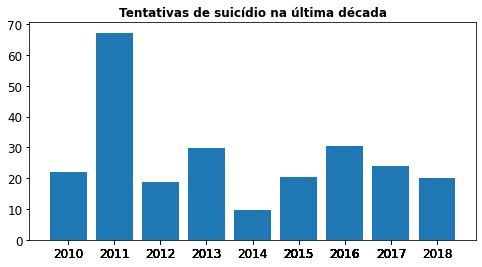

In [123]:
# ploting 1

y = data['Attempted_suicide']
x = data['Year']

figura = plt.figure(figsize=(8,4))
plt.bar(data['Year'], data['Attempted_suicide'], label = data)
plt.title('Tentativas de suicídio na última década',fontweight='bold')
# plt.xlabel = ('Qt de tentativas')
# plt.yabel = ('Ano da tentativa')

plt.xticks(x)

plt.tick_params(labelsize=12, width= 1)
plt.show()

# **3.1 Statistical hypothesis testing**:
---

*   **What are the hypothesis?**


1.   Does having understading parents influence on teens with suicidal behaviour?
2.   Does having close friends influence on teens with suicidal behaviour?
3.   What is the effect on having both understading parents and close friends on teens with suicidal behaviour?








In [201]:
# t test
# collecting data
has_close_relationships = data['Have_Understanding_Parents'], data['No_close_friends'], data['Attempted_suicide'], data['Age Group']
has_close_relationships = pd.DataFrame(has_close_relationships)
display(has_close_relationships)

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
Have_Understanding_Parents,41.5,44.5,37.1,39.8,46.2,49.9,48.1,44.8,35.7,39.7,...,13.9,17.4,16.2,21.5,18.3,20.2,36.3,36.3,36.5,37.8
No_close_friends,4.8,5.5,6.3,6.6,6.1,4.3,6.8,8.3,10.8,14.2,...,7.9,10.7,9.7,7.6,17.0,14.3,4.1,3.3,7.3,1.5
Attempted_suicide,19.9,10.4,17.4,11.2,12.9,18.9,10.4,15.4,14.4,9.6,...,30.3,18.6,23.1,16.7,28.3,19.5,14.7,16.9,9.0,16.2
Age Group,13-15,13-15,16-17,16-17,13-15,13-15,13-15,13-15,13-15,13-15,...,13-15,13-15,16-17,16-17,13-15,13-15,13-15,13-15,16-17,16-17


### 3.1.1 Does having **understading parents** influence on teens with suicidal behaviour?

In [153]:
# collecting data
group1 = data['Attempted_suicide']
group2 = data['Have_Understanding_Parents']

In [154]:
# converting the list to array
x = np.array(group1)
y = np.array(group2)

In [155]:
# calculating the variance of each group
print(np.var(group1), np.var(group2))

def f_test(group1, group2):
	f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
	nun = x.size-1
	dun = y.size-1
	p_value = 1-scipy.stats.f.cdf(f, nun, dun)
	return f, p_value

85.1887184051264 132.35934496262016


In [158]:
# perform F-test
f_test(x, y)

(0.6436169537495422, 0.9875614828289081)

#### **Result:**
The F test statistic is 0.64 and the p-value is 0.987 so we reject the null hypothesis as p-value <=0.05. 

This means that statistically speaking, having understading parents do not have significant cause of variability on its own.

### 3.1.2 Does having close friends influence on teens with suicidal behaviour?

In [165]:
# test 2
# Create data
group3 = data['Attempted_suicide']
group4 = data['No_close_friends']

In [166]:
# converting the list to array
x1 = np.array(group1)
y1 = np.array(group2)

In [167]:
# calculate variance of each group
print(np.var(group3), np.var(group4))

def f_test(group3, group4):
	f = np.var(group3, ddof=1)/np.var(group4, ddof=1)
	a = x1.size-1
	b = y1.size-1
	p_value = 1-scipy.stats.f.cdf(f, a, b)
	return f, p_value

85.1887184051264 18.87567550729797


In [168]:
# perform F-test
f_test(x1, y1)

(0.6436169537495422, 0.9875614828289081)

#### **Result:**
The F test statistic is 0.64 and the p-value is 0.987 so we reject the null hypothesis as p-value <=0.05. 

This means that statistically speaking, not having close friends also do not have significant cause of variability on its own.

### 3.1.3 What is the effect on having both understading parents and close friends on teens with suicidal behaviour?

https://www.gov.br/saude/pt-br/assuntos/noticias/2022/setembro/anualmente-mais-de-700-mil-pessoas-cometem-suicidio-segundo-oms

https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-09209-z 